In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv("fcc-forum-pageviews.csv",index_col=0,parse_dates=True)

In [3]:
df.sort_values(by=['value'])

,value
date,
2016-05-09,1201
2016-05-11,1716
2016-05-10,2329
2016-05-16,2591
2016-05-15,2927
...,...
2019-11-15,314101
2019-08-06,337325
2019-08-07,341595


In [4]:
# Clean data
df = df[(df["value"] > df["value"].quantile(0.025)) &
        (df["value"] < df["value"].quantile(0.975))]

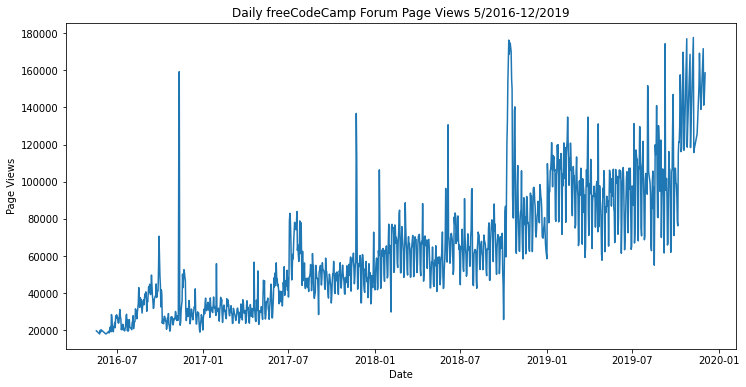

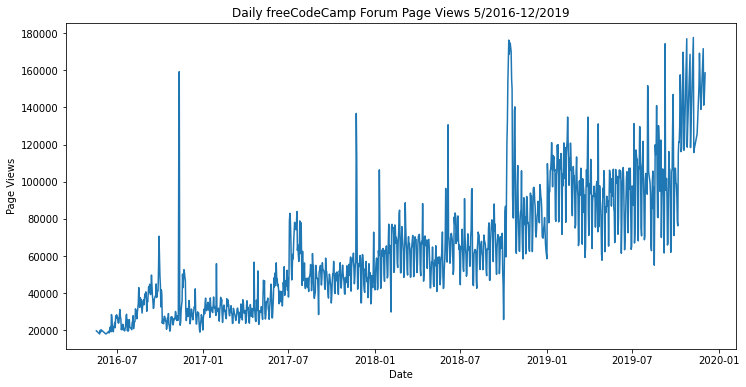

In [5]:
def draw_line_plot():
    # Draw line plot
    fig = plt.figure(figsize=(12, 6))
    plt.plot(df) 
    plt.ylabel('Page Views')
    plt.xlabel('Date')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019') 
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig
draw_line_plot()

In [6]:
df.groupby([(df.index.year),(df.index.month)]).mean()

value
date date               
2016 5      19432.400000
     6      21875.105263
     7      24109.678571
     8      31049.193548
     9      41476.866667
     10     27398.322581
     11     40448.633333
     12     27832.419355
2017 1      32785.161290
     2      31113.071429
     3      29369.096774
     4      30878.733333
     5      34244.290323
     6      43577.500000
     7      65806.838710
     8      47712.451613
     9      47376.800000
     10     47438.709677
     11     57701.566667
     12     48420.580645
2018 1      58580.096774
     2      65679.000000
     3      62693.774194
     4      62350.833333
     5      56562.870968
     6      70117.000000
     7      63591.064516
     8      62831.612903
     9      65941.733333
     10    111378.142857
     11     78688.333333
     12     80047.483871
2019 1     102056.516129
     2     105968.357143
     3      91214.483871
     4      89368.433333
     5      91439.903226
     6      90435.642857
     7      97236.566667
     8     102717.310345
     9      97268.833333
     10    122802.272727
     11    143166.428571
     12    150733.500000

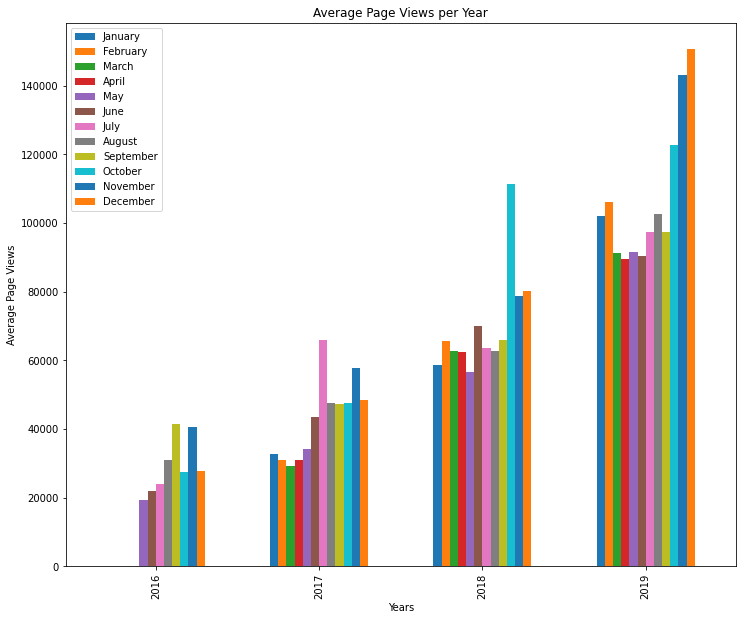

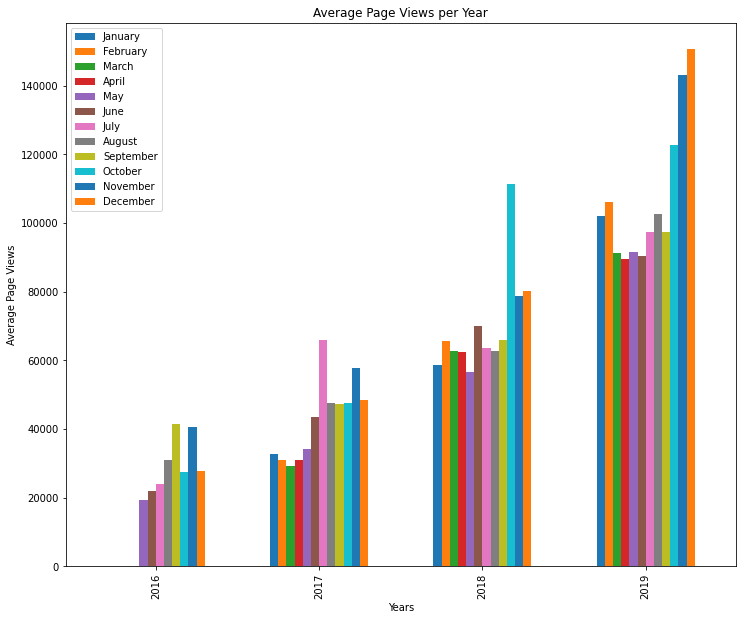

In [7]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.groupby([(df.index.year),(df.index.month)]).mean()

    # Draw bar plot
    fig = df_bar.unstack().plot(kind='bar',figsize=(12, 10),width=0.6).figure
    plt.legend(labels=("January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"))
    plt.xlabel("Years")
    plt.ylabel("Average Page Views")
    plt.title("Average Page Views per Year")

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot()

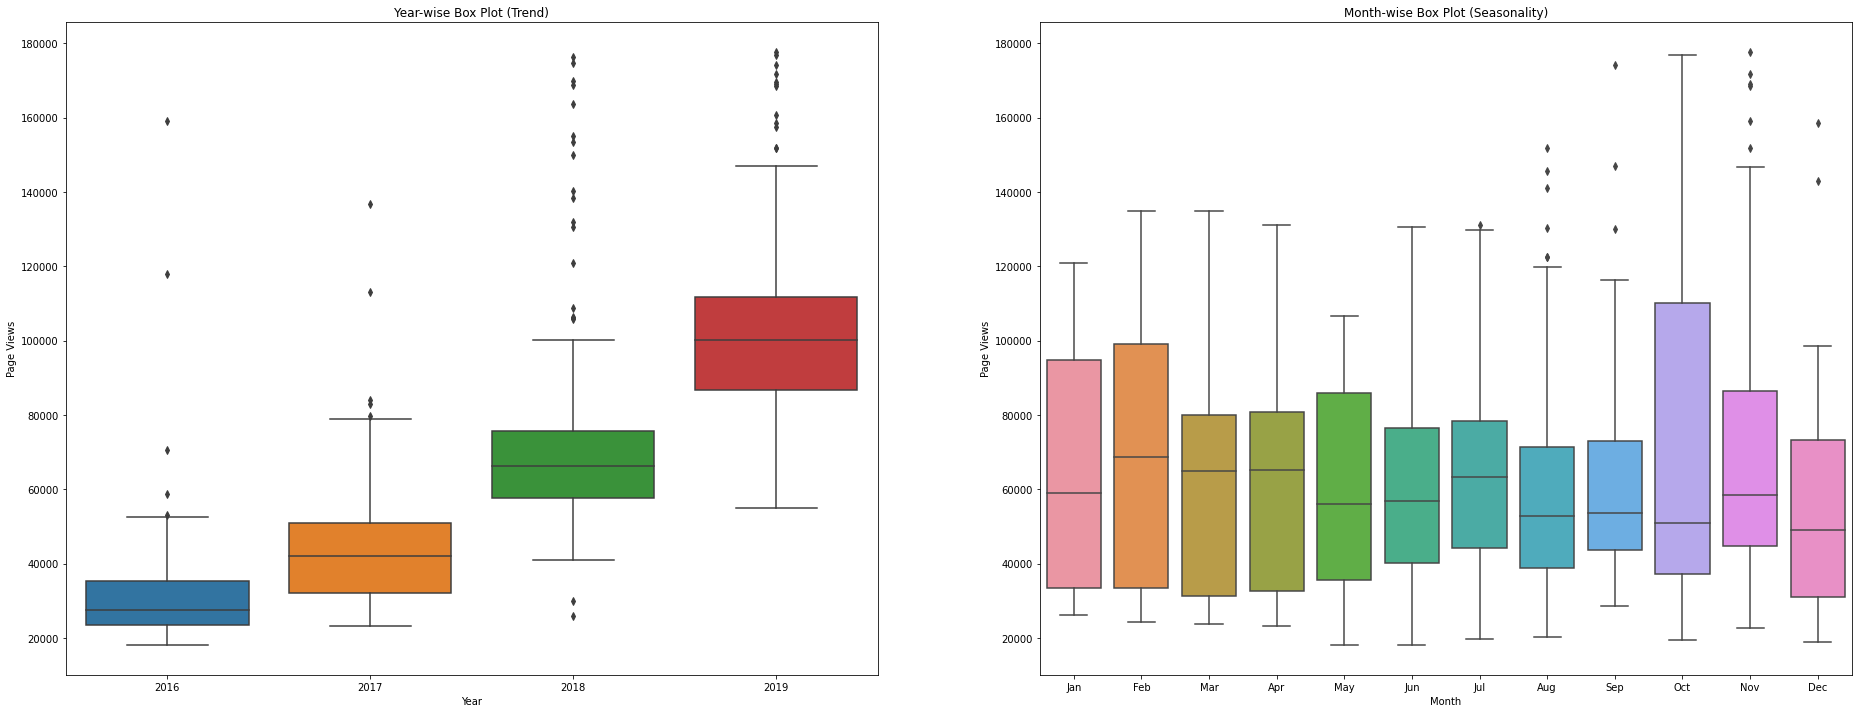

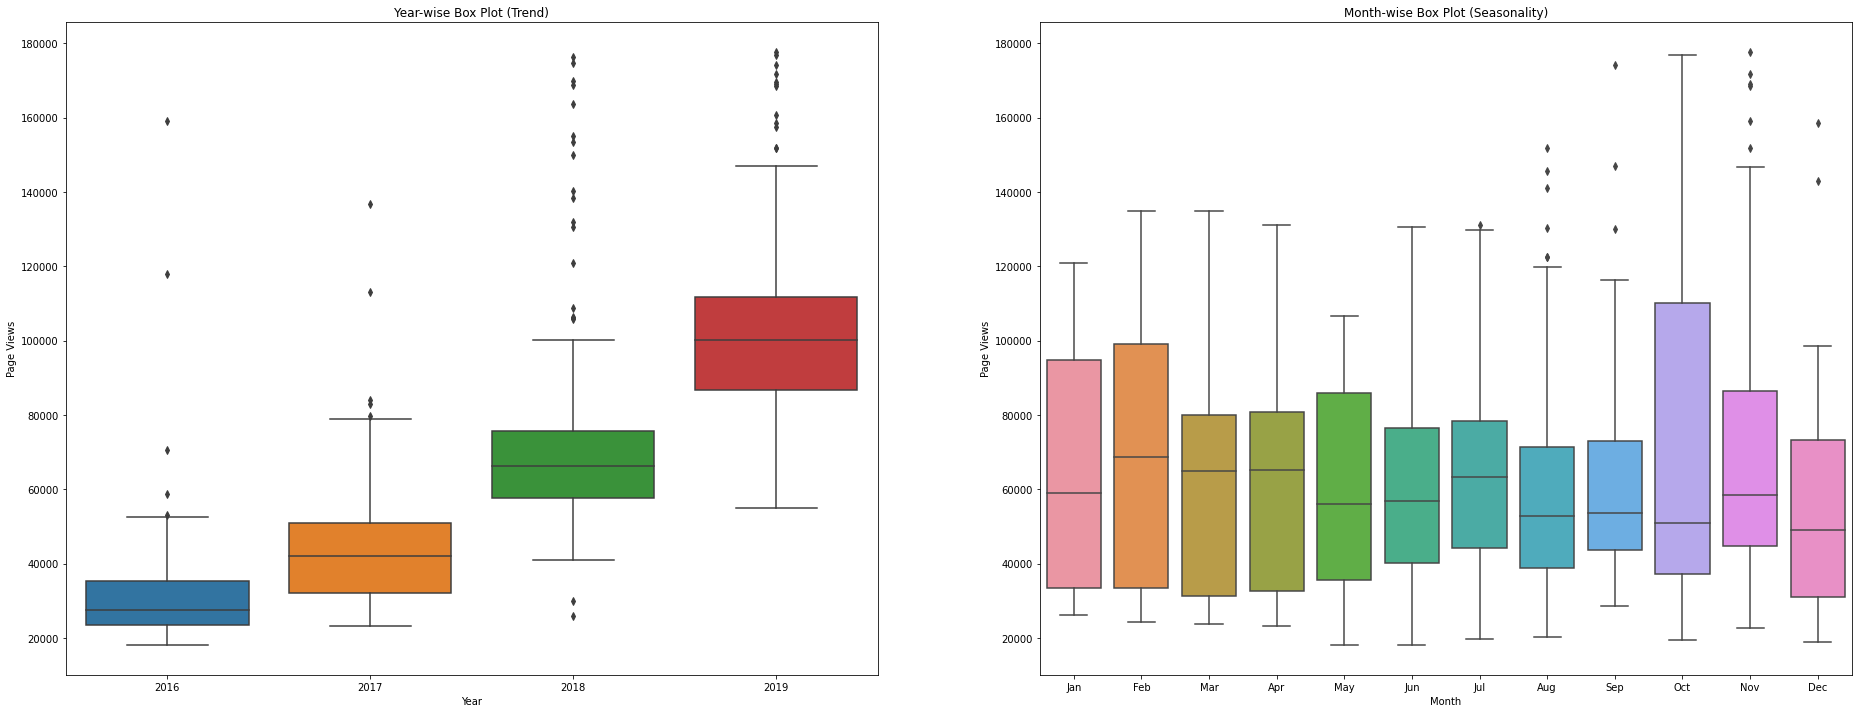

In [8]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    # Sort by month
    df_box["month_1"] = df_box["date"].dt.month
    df_box = df_box.sort_values("month_1")

    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(32, 12))
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    sns.boxplot(ax=ax1, x="year", y="value", data=df_box)
    sns.boxplot(ax=ax2, x="month", y="value", data=df_box)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
draw_box_plot()